# ANOVA

Suppose that a study wants to check if there is a significant difference between the goal averages of soccer players depending on the position in which they play. In case there is a difference, you want to know which positions differ from the rest.

#### The following table contains a sample of randomly selected players.

In [1]:
import pandas as pd
my_data = pd.read_csv("datos_laliga.csv")
my_data

,id_player,position,average
0,id_189,DC,0.310
1,id_85,DC,0.306
2,id_105,DC,0.320
3,id_34,DC,0.329
4,id_32,DC,0.369
...,...,...,...
322,id_231,DC,0.381
323,id_20,MP,0.310
324,id_294,DC,0.340
325,id_218,DC,0.305


In [2]:
my_data.describe()

,average
count,327.000000
mean,0.332159
std,0.035702
min,0.174000
25%,0.309000
50%,0.331000
75%,0.354500
max,0.437000


Identify the number of groups and number of observations per group to determine if it is a balanced model. The mean and standard deviation of the group are also calculated.

In [3]:
pd.crosstab(my_data["position"],columns=["DC", "MO", "MP", "P"])
#DC: Delantero centro
#MO: Medio ofensivo
#MP: Media punta
#P: Puntero

col_0,DC
col_1,MO
col_2,MP
col_3,P
position,
DC,154
MO,14
MP,120
P,39


Calculate the mean and standar deviation by position

In [4]:
my_data.groupby('position')['average'].agg('mean')

position
DC    0.331526
MO    0.347786
MP    0.334250
P     0.322615
Name: average, dtype: float64

Calculate the standard deviation by position

In [5]:
my_data.groupby('position')['average'].agg('std')

position
DC    0.037095
MO    0.036037
MP    0.029444
P     0.045132
Name: average, dtype: float64

Since the number of observations per group is not constant, it is an unbalanced model. It is important to take this into account when checking the conditions of normality and homoscedasticity (s1 = s2 = s3 = s4). The most useful graphical representation before performing an ANOVA is the Box-Plot model.

Plot a boxplot for each position

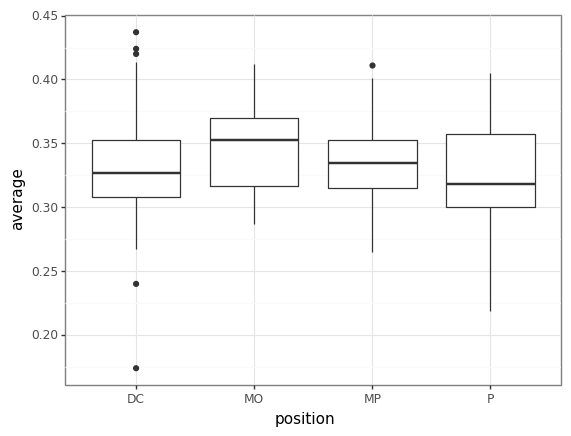

<ggplot: (8759898354017)>

In [6]:
# Boxplots
# This is another way and popular package used in R (ggplot)
from plotnine import *

(
    ggplot(my_data)  # What data to use
    + aes(x="position", y="average")  # What variable to use
    + geom_boxplot()  # Geometric object to use for drawing
    + theme_bw()
)

# Independence:
  
The total sample size is <10% of the population of all players in the league.
The groups (categorical variable) are independent of each other since a random sample of players from the entire league (not just from the same team) has been made.
 
Normal distribution of observations: The quantitative variable must be distributed in a normal way in each of the groups. The normality study can be done graphically (qqplot) or with a hypothesis test.

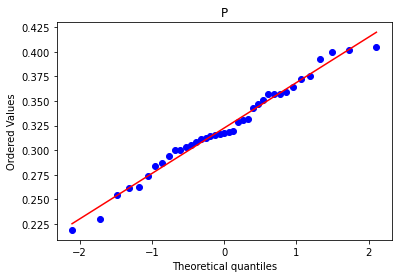

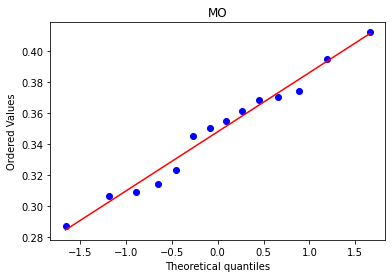

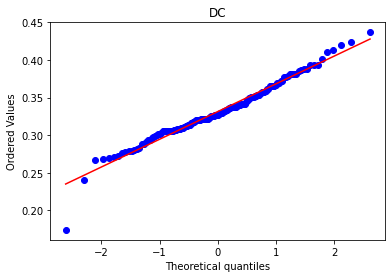

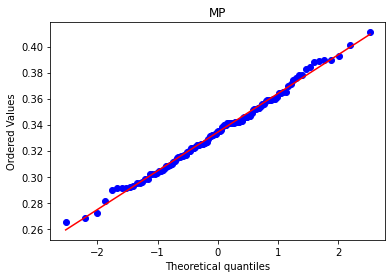

In [7]:
import numpy as np 
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats

measurements = my_data.loc[my_data["position"] == "P","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("P")
plt.show()

measurements = my_data.loc[my_data["position"] == "MO","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MO")
plt.show()

measurements = my_data.loc[my_data["position"] == "DC","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("DC")
plt.show()

measurements = my_data.loc[my_data["position"] == "MP","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MP")
plt.show()

In [8]:
# Using plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=x))
fig.add_trace(go.Box(y=y))
fig.show()

NameError: name 'x' is not defined

Se puede emplear el test de Kolmogorov-Smirnov simple o con la correccion de Lilliefors.
La funcion en R se llama lillie.test() y se encuentra en el paquete nortest.

In [ ]:
# Beginner way to do it

from statsmodels.stats.diagnostic import lilliefors

my_df = pd.DataFrame(index=np.arange(len(np.unique(my_data["position"]))), columns=["position", "D_statistic", "p_value"])
my_df["position"] = np.unique(my_data["position"])

for position in my_df["position"]:
    my_data_subset = my_data.loc[my_data["position"] == position,:]
    D_statistic, p_value = lilliefors(my_data_subset.average)
    my_df.loc[my_df["position"]==position,["D_statistic", "p_value"]] = D_statistic, p_value
    
print(my_df)

In [ ]:
#Another way to do it (Highly recommendable)
my_data.groupby("position")["average"].apply(lilliefors)

The hypothesis tests do not show evidence of a lack of normality.

Constant variance between groups (homoscedasticity):
   
Given that there is a group (DC) that is at the limit to accept that it is distributed in a normal way, the Fisher and Bartlett tests are not recommended. Instead it is better to use a test based on the median Levene test or the Fligner-Killeen test.

In [ ]:
from scipy import stats

values_array = pd.DataFrame(my_data.groupby("position")["average"]).to_numpy()

print(stats.fligner(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

print(stats.levene(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

# stats.fligner(values_array[:,1]) # I don't know why this doesn't work :(


There is no significant evidence of lack of homoscedasticity in either of the two tests.

The study of the conditions can be carried out after calculating the ANOVA, since if they are not fulfilled, it does not make much sense to continue. However, the most appropriate way to verify that the necessary conditions are satisfied is by studying the model residuals once the ANOVA has been generated. R allows you to graph the residuals directly with the plot function (anova object).

In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('average ~ position', data=my_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
# ANOVA with package bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=my_data, res_var='value', anova_model='average ~ position')
res.anova_summary
# output (ANOVA F and p value)

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.scatter(res.anova_model_out.fittedvalues, res.anova_model_out.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Given that the p-value is higher than 0.05, there is not enough evidence to consider that at least two means are different. The graphical representation of the residuals does not show lack of homoscedasticity (graph 1) and in the qqplot the residuals are distributed very close to the normal line (graph 2 and 3).